In [84]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
# Define parameters
genes = 102
cells = 100

sim_data_file = "simulated_data.tsv"
sim_network_file = "simulated_network.tsv"

# Value range of transcription factor (TF) for each gene eg. 0-500
tf_range = [0, 500]

deviation = 150
noise = 0.75

In [122]:
# Create custom dataframe of 103 rows and 1000 columns with all values 0
df = pd.DataFrame(
    np.zeros((genes, cells)),
    columns=[f"Cell{i}" for i in range(cells)],
    index=[f"Gene{i}" for i in range(genes)],
)
print(df.shape)
df.head()

(102, 100)


,Cell0,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,...,Cell90,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99
Gene0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Change Gene0 and Gene51 in index to TF1 and TF2
df.rename(index={"Gene0": "TF1", f"Gene{genes // 2}": "TF2"}, inplace=True)
print(df.shape)
df.head()

(102, 100)


,Cell0,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,...,Cell90,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99
TF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Update the values of index TF1 to random values between 0 and 100
df.loc["TF1"] = np.random.randint(tf_range[0], tf_range[1], cells)
df.loc["TF2"] = np.random.randint(tf_range[0], tf_range[1], cells)
df.head()

,Cell0,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,...,Cell90,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99
TF1,25.0,365.0,281.0,384.0,367.0,202.0,211.0,477.0,265.0,322.0,...,398.0,263.0,415.0,37.0,68.0,1.0,361.0,264.0,288.0,400.0
Gene1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gene4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# Gene1 to Gene50 are positively correlated with TF1
for i in range(1, genes // 2):
    df.loc[f"Gene{i}"] = df.loc["TF1"] * noise + np.random.rand(cells) * deviation
print(df.shape)
df.head(10)

(102, 100)


,Cell0,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,...,Cell90,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99
TF1,25.000000,365.000000,281.000000,384.000000,367.000000,202.000000,211.000000,477.000000,265.000000,322.000000,...,398.000000,263.000000,415.000000,37.000000,68.000000,1.000000,361.000000,264.000000,288.000000,400.000000
Gene1,53.852701,350.482833,331.951487,350.230732,313.030075,214.182009,277.727527,425.451144,278.136243,350.801724,...,328.822314,334.882632,411.075928,108.820884,79.038116,107.294671,381.376852,316.828443,229.844582,377.163558
Gene2,59.426897,291.904596,345.831514,431.525665,392.635180,206.147822,266.231841,431.306072,325.696299,269.092425,...,446.232572,225.792568,399.403295,96.868137,168.203702,12.149664,301.766864,252.282332,316.749656,369.540188
Gene3,157.071862,418.545212,337.857786,381.144497,297.345278,193.741368,196.666040,459.610502,340.100336,270.952079,...,444.960097,305.287034,327.820255,86.780795,126.059073,55.989884,366.612463,212.441387,244.800019,441.552485
Gene4,44.231569,315.072001,345.169208,323.184300,366.907084,261.151022,210.808298,375.912999,286.822267,272.409013,...,422.284965,321.188950,427.815940,58.136174,60.394498,48.100224,390.307142,278.044223,217.998516,304.186970
Gene5,144.919594,353.365582,222.632425,385.631378,398.645675,286.889796,193.876209,358.035866,272.971580,336.454227,...,341.923951,330.271937,342.298061,90.140327,133.987756,78.703445,314.609604,309.145941,260.054611,425.626760
Gene6,64.922127,277.121660,215.932209,411.458271,337.984786,233.374177,270.132160,489.329055,314.448114,317.529539,...,379.022321,290.505154,414.941860,52.794024,88.115282,6.772847,291.830290,271.529934,303.977172,439.304457
Gene7,29.254301,364.496694,254.489630,374.294715,281.806576,173.416772,180.657995,416.192880,289.434497,341.560491,...,401.249295,286.345901,328.567777,106.677526,142.959478,9.794129,396.216440,286.664444,290.416093,351.905080
Gene8,32.672612,279.109205,242.214608,330.627575,413.888135,205.015157,170.434749,383.867215,278.831570,278.567137,...,319.745765,231.536261,452.779057,118.255404,107.643886,17.252306,277.430380,270.785490,251.707758,346.933992
Gene9,50.887018,298.834021,324.258068,410.186545,329.492669,182.199201,193.277229,371.277180,284.825131,348.745612,...,303.607889,309.992771,377.918519,83.527338,60.379667,62.274598,399.622136,276.377821,323.469553,423.827921


In [129]:
# Gene52 to Gene102 are negatively correlated with TF2
max_value = df.loc["TF2"].max()
for i in range(genes // 2, genes):
    df.loc[f"Gene{i}"] = max_value - df.loc["TF2"] * noise + np.random.rand(cells) * deviation
df.iloc[50:60]

,Cell0,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,...,Cell90,Cell91,Cell92,Cell93,Cell94,Cell95,Cell96,Cell97,Cell98,Cell99
Gene50,140.268601,274.378927,269.542398,305.288550,387.067845,233.632099,163.567273,504.475381,302.391064,366.805906,...,388.809104,301.041776,347.088285,89.590646,182.450410,25.803563,339.272590,205.420016,249.709904,423.948676
TF2,309.000000,400.000000,466.000000,239.000000,96.000000,260.000000,27.000000,225.000000,447.000000,57.000000,...,165.000000,368.000000,229.000000,15.000000,61.000000,283.000000,423.000000,75.000000,61.000000,85.000000
Gene52,381.685753,317.222330,266.574811,361.599775,545.507378,415.647241,507.775352,468.514929,163.184238,512.251869,...,395.448938,315.758001,391.851407,636.173469,530.778894,349.501097,226.822204,504.861180,526.669113,556.535007
Gene53,291.280770,245.741460,189.080459,421.754567,559.000554,327.753236,557.482300,377.800575,180.756831,572.735899,...,420.697268,279.646108,388.230633,533.283426,538.971092,306.845185,235.686901,571.321658,493.673931,536.660442
Gene54,345.617160,290.502765,268.445498,403.360877,476.536173,343.868264,546.607288,434.896479,236.281111,469.756544,...,453.557632,358.235875,420.809146,530.241543,555.694289,407.673078,325.277242,544.715301,591.892158,541.126983
Gene55,284.866991,318.927705,179.290983,334.466277,460.092094,395.622526,495.115934,329.380416,297.586318,504.679832,...,398.591739,319.805802,472.623849,558.152032,466.410973,300.239371,287.907255,442.306443,511.588323,575.115916
Gene56,272.674668,274.406524,285.783825,466.836739,432.488295,317.661440,511.393220,358.445993,290.671404,583.280005,...,456.339184,251.561911,399.286654,488.517850,521.985267,375.585235,207.021734,494.530551,492.356202,569.429184
Gene57,386.453162,334.917708,153.946653,405.717236,557.084525,417.242580,582.798788,355.659708,288.448218,593.413198,...,508.971360,276.938091,339.776433,538.672891,472.806681,366.181904,193.246541,500.238419,576.087349,576.262050
Gene58,308.110473,279.718193,175.079957,421.931530,496.483549,378.781299,502.941675,397.838616,212.678055,499.800195,...,418.931627,239.445812,364.839259,522.939238,593.624309,364.127351,268.123918,583.628841,562.085538,510.976913
Gene59,316.266279,314.572066,219.362095,400.348222,495.767216,375.226562,482.561851,379.449114,190.395189,490.115251,...,480.700942,224.582576,462.790702,608.485573,572.302511,324.872685,293.797825,585.747891,543.853561,458.612328


In [130]:
df.to_csv(sim_data_file, index=True, header=True, sep="\t")

---

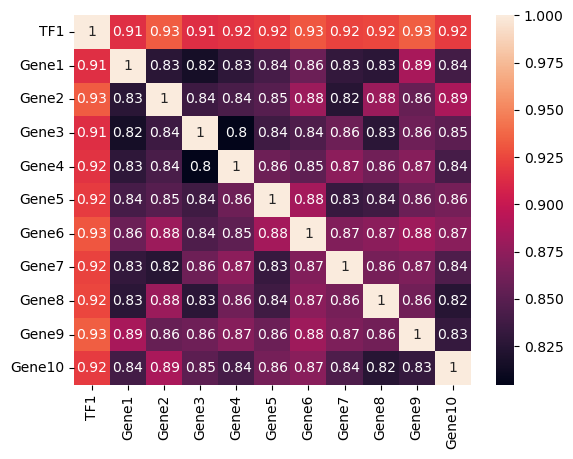

In [132]:
# Check correlation between TF1 and Gene1 to Gene15 also draw correlation plot
sns.heatmap(
    df.loc[
        [
            "TF1",
            "Gene1",
            "Gene2",
            "Gene3",
            "Gene4",
            "Gene5",
            "Gene6",
            "Gene7",
            "Gene8",
            "Gene9",
            "Gene10"
        ]
    ].T.corr(),
    annot=True,
)
plt.show()

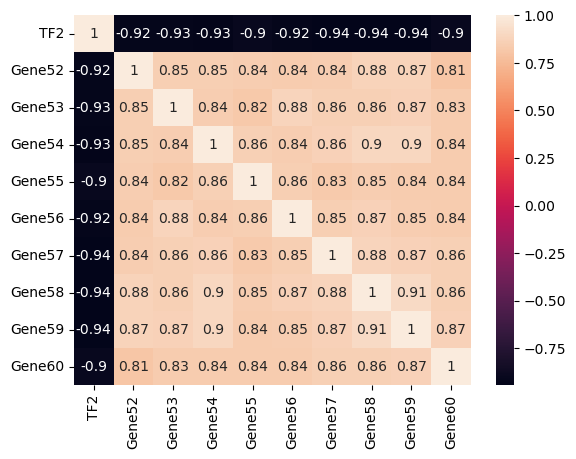

In [133]:
# Check correlation between TF2 and Gene52 to Gene58 also draw correlation plot. Because Gene52 to Gene102 are negatively correlated with TF2
sns.heatmap(
    df.loc[
        [
            "TF2",
            "Gene52",
            "Gene53",
            "Gene54",
            "Gene55",
            "Gene56",
            "Gene57",
            "Gene58",
            "Gene59",
            "Gene60",
        ]
    ].T.corr(),
    annot=True,
)
plt.show()

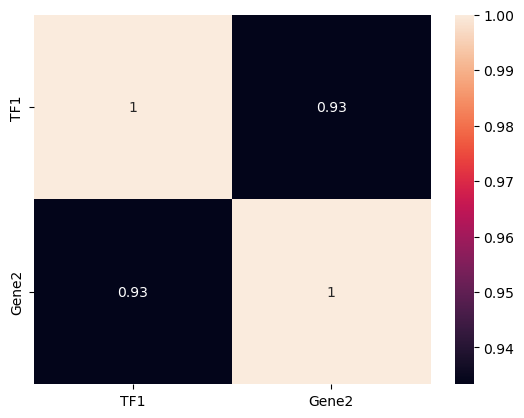

In [134]:
# Check correlation between TF1 and Gene2 and heatmap
sns.heatmap(df.loc[["TF1", "Gene2"]].T.corr(), annot=True)
plt.show()

<Axes: >

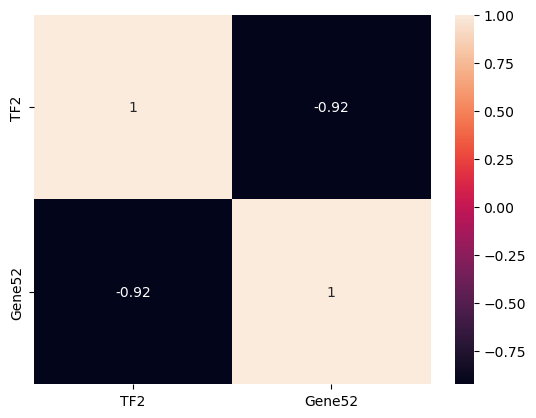

In [135]:
sns.heatmap(df.loc[["TF2", "Gene52"]].T.corr(), annot=True)

In [136]:
# Create a network file

with open(sim_network_file, "w") as f:
    for i in range(1, genes // 2):
        f.write(f"TF1\tGene{i}\t1\n")
    for i in range(genes // 2 + 1, genes):
        f.write(f"TF2\tGene{i}\t-1\n")
f.close()

# Add header to the network file as Regulator Target MI
network = pd.read_csv(sim_network_file, sep="\t", header=None)
network.columns = ["Regulator", "Target", "MI"]
network.to_csv(sim_network_file, index=False, sep="\t")
network.head(10)

,Regulator,Target,MI
0,TF1,Gene1,1
1,TF1,Gene2,1
2,TF1,Gene3,1
3,TF1,Gene4,1
4,TF1,Gene5,1
5,TF1,Gene6,1
6,TF1,Gene7,1
7,TF1,Gene8,1
8,TF1,Gene9,1
9,TF1,Gene10,1


---

In [72]:
# Generate a random dataset
x = np.random.randn(100)

# Create a positively correlated dataset by scaling and adding a small random noise
y = (x * 2 + np.random.randn(100) * 0.1) 
# The small random noise ensures that the correlation is not perfect

print(np.corrcoef(x, y))

[[1.        0.9988162]
 [0.9988162 1.       ]]


In [73]:
# Generate a random dataset
x = np.random.randn(100)

# Create a negatively correlated dataset by inverting x and adding a small random noise
y = -x * 2 + np.random.randn(100) * 0.1
# The small random noise ensures that the correlation is not perfect

print(np.corrcoef(x, y))

[[ 1.         -0.99848934]
 [-0.99848934  1.        ]]


In [82]:
# Generate a random dataset with only positive values
x = np.abs(np.random.randn(100))

# Create a positively correlated dataset by scaling x and adding a small random noise
y = x * 1.5 + np.random.rand(100) * 0.1  # The noise is also positive
print(np.corrcoef(x, y))

[[1.         0.99944924]
 [0.99944924 1.        ]]


In [83]:
# Generate a random dataset with only positive values
x = np.abs(np.random.randn(100))

# Determine a constant that is greater than the max of x after scaling
constant = max(x) * 2

# Create a negatively correlated dataset by subtracting a scaled version of x from the constant
y = constant - x * 1.5 + np.random.rand(100) * 0.1
print(np.corrcoef(x, y))

[[ 1.        -0.9995929]
 [-0.9995929  1.       ]]
